In [1]:
import pickle
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import pymc3 as pm
import math

In [2]:
track = pickle.load(open("mario_track_1.pkl"))

In [3]:
np.shape(track)

(347, 4)

In [4]:
def thresholds(vals, t_window=5):
    last_diff = 0
    last_diff_t = 0
    max_v = min(vals)
    min_v = max(vals)
    thresholds = set([0, min_v, max_v])
    for t, v in enumerate(vals):
        if (t - last_diff_t) == t_window:
            thresholds.add(last_diff)
        if v != last_diff:
            last_diff = v
            last_diff_t = t
    return thresholds

axis = 2
window = 3

velocities = track[1:,axis]-track[:-1,axis] 
print velocities
print np.convolve(velocities, np.ones(window)/window, mode='valid')

thresholds(velocities)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  5.  5.  5.  4.  4.  4.  4.  4.
  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1. -1. -2. -2.
 -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4.  3.
  3.  2.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3. -4. -5.  5.  5.  5.  5.
  4.  4.  3.  3.  2. -1. -1. -1. -2. -3. -3. -4. -4. -4. -4. -4. -4. -1.
  5.  5.  5.  3.  3.  3.  2.  2.  0.  1.  0.  3.  5.  5.  5.  5.  4.  4.
  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1.
 -1. -2. -2. -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  0.  5.  5.  5.  5.  4.  4.  4.
  4.  4.  3.  4.  3.  3.  3.  3.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3.
 -4.  5.  5.  5.  5.  4.  4.  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.
  3.  2.  2.  2.  1.  2.  1.  2.  1.  1.  0.  1.  1.  0.  0. -1. -2. -2.
 -2. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4

{-5.0, -4.0, -1.0, 0, 3.0, 4.0, 5.0}

In [5]:
def samey_intervals(vals, t_window=5):
    last_diff = 0
    last_diff_t = 0
    intervals = []
    for t, v in enumerate(vals):
        if ((t - last_diff_t) >= t_window) and v != last_diff:
            intervals.append(last_diff_t)
            intervals.append(t-1)
            intervals.append(t)
        if v != last_diff:
            last_diff = v
            last_diff_t = t
    return intervals

axis = 2
window = 2

velocities = track[1:,axis]-track[:-1,axis] 
smoothed = scipy.ndimage.filters.convolve1d(velocities, np.ones(window)/window)

print velocities
print smoothed

print samey_intervals(velocities)
print samey_intervals(smoothed)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  5.  5.  5.  4.  4.  4.  4.  4.
  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1. -1. -2. -2.
 -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4.  3.
  3.  2.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3. -4. -5.  5.  5.  5.  5.
  4.  4.  3.  3.  2. -1. -1. -1. -2. -3. -3. -4. -4. -4. -4. -4. -4. -1.
  5.  5.  5.  3.  3.  3.  2.  2.  0.  1.  0.  3.  5.  5.  5.  5.  4.  4.
  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1.
 -1. -2. -2. -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  0.  5.  5.  5.  5.  4.  4.  4.
  4.  4.  3.  4.  3.  3.  3.  3.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3.
 -4.  5.  5.  5.  5.  4.  4.  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.
  3.  2.  2.  2.  1.  2.  1.  2.  1.  1.  0.  1.  1.  0.  0. -1. -2. -2.
 -2. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4

In [6]:
def zero_crossings(vals):
    sign_intervals = []
    last_sign_change = 0
    vsigns = np.sign(vals)
    last_sign = vsigns[0]
    for t, v in enumerate(vsigns):
        if last_sign == 0:
            last_sign = v
        elif v == 0 or v == last_sign:
            continue
        elif v != last_sign:
            sign_intervals.append(last_sign_change)
            sign_intervals.append(t-1)
            sign_intervals.append(t)
            last_sign = v
            last_sign_change = t
    if t - 1 != last_sign_change:
        sign_intervals.append(last_sign_change)
        sign_intervals.append(t)
    return sign_intervals

axis = 2
window = 2

velocities = track[1:,axis]-track[:-1,axis] 
smoothed = scipy.ndimage.filters.convolve1d(velocities, np.ones(window)/window)

print velocities
print smoothed

print zero_crossings(velocities)
print zero_crossings(smoothed)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  5.  5.  5.  4.  4.  4.  4.  4.
  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1. -1. -2. -2.
 -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4.  3.
  3.  2.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3. -4. -5.  5.  5.  5.  5.
  4.  4.  3.  3.  2. -1. -1. -1. -2. -3. -3. -4. -4. -4. -4. -4. -4. -1.
  5.  5.  5.  3.  3.  3.  2.  2.  0.  1.  0.  3.  5.  5.  5.  5.  4.  4.
  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.  3.  2.  1.  1.  1.  0. -1.
 -1. -2. -2. -3. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  0.  5.  5.  5.  5.  4.  4.  4.
  4.  4.  3.  4.  3.  3.  3.  3.  2.  1.  1.  0. -1. -1. -1. -2. -3. -3.
 -4.  5.  5.  5.  5.  4.  4.  4.  4.  4.  3.  4.  3.  3.  3.  3.  3.  2.
  3.  2.  2.  2.  1.  2.  1.  2.  1.  1.  0.  1.  1.  0.  0. -1. -2. -2.
 -2. -3. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.
 -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.  4

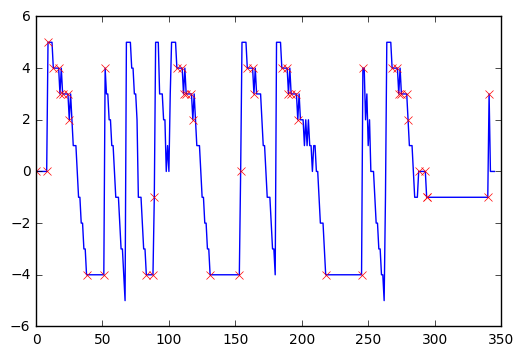

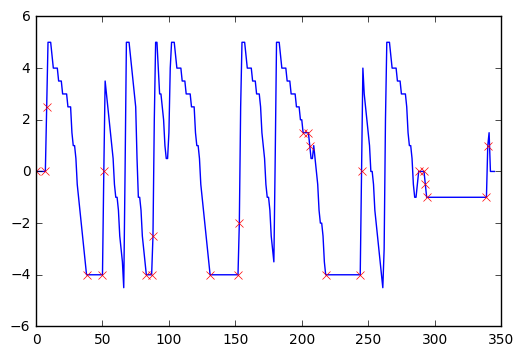

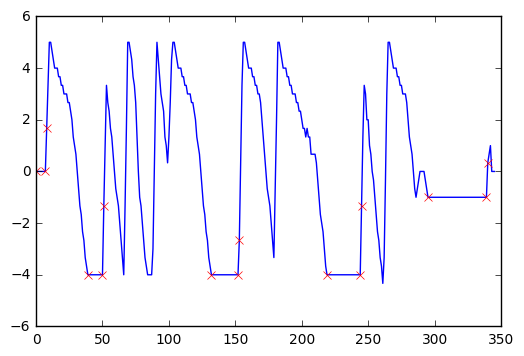

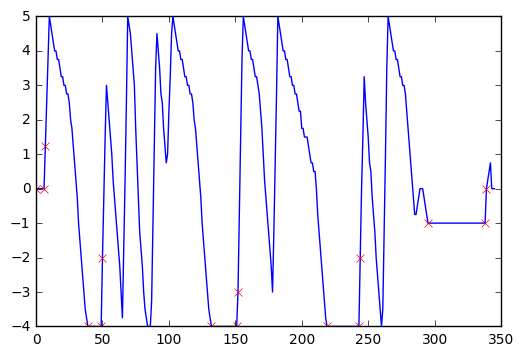

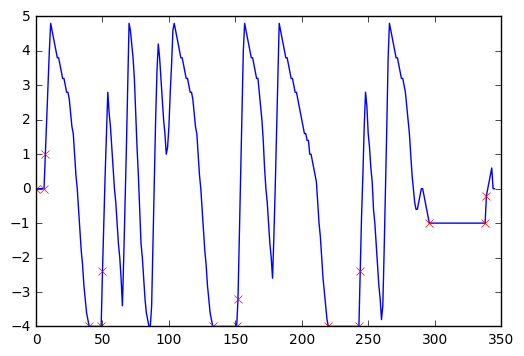

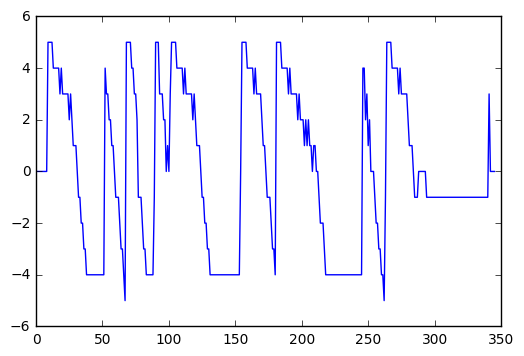

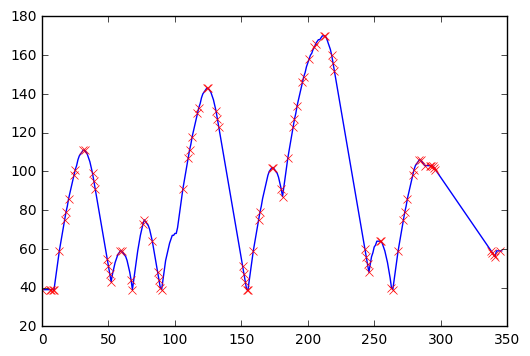

In [7]:
axis = 2

velocities = track[1:,axis]-track[:-1,axis] 

same_window = 5

switch_points = set([])
switch_points |= set(zero_crossings(velocities))
for w in range(1,6):
    smoothed = scipy.ndimage.filters.convolve1d(velocities, np.ones(w)/w)
    #print smoothed
    plt.plot(smoothed)
    
    points = samey_intervals(smoothed,t_window=same_window)
    plt.plot(np.array(points),smoothed[np.array(points,dtype='int')],'rx')
    plt.show()
    switch_points |= set(points)


velocity_times = sorted(switch_points)

plt.plot(velocities)
plt.show()

plt.plot(track[:,2])
plt.plot(np.array(velocity_times),track[np.array(velocity_times,dtype='int'),2],'rx')
plt.show()


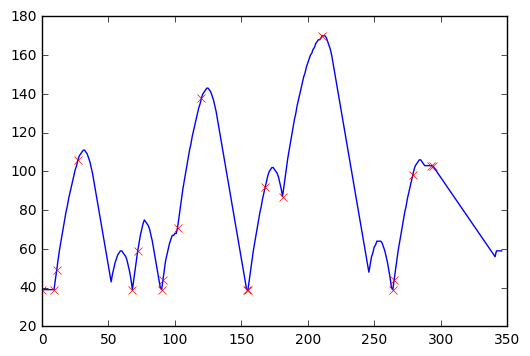

In [8]:
def button_change_times(button_masks):
    last_mask = 0
    mask_times = []
    for t, b in enumerate(button_masks):
        if b != last_mask:
            mask_times.append(t)
            last_mask = b
    return mask_times

button_times = button_change_times(track[:,3])

plt.plot(track[:,2])
plt.plot(np.array(button_times),track[np.array(button_times,dtype='int'),2],'rx')
plt.show()

In [9]:
# Templates is an array of model-generating functions of increasing complexity.
templates = [
    # Constant 0 velocity
    ("c0",lambda n,axis,vs,pv: pm.Normal(
        n, 
        mu=0,
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Constant velocity from old value
    ("cP",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pv,
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Fixed constant velocity
    ("cN",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pm.Normal(n+"_N",mu=0,sd=10),
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Constant acceleration from 0
    ("acc0",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pm.Normal(n+"_acc",mu=0,sd=10)*vs[:,0],
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Constant acceleration from old velocity value
    ("accP",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pv+pm.Normal(n+"_acc",mu=0,sd=10)*vs[:,0],
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
    # Constant acceleration from fixed constant velocity
    ("accN",lambda n,axis,vs,pv: pm.Normal(
        n,
        mu=pm.Normal(n+"_N",mu=0,sd=10)+pm.Normal(n+"_acc",mu=0,sd=20)*vs[:,0],
        sd=pm.HalfCauchy(n+"_err",beta=10),
        observed=vs[:,axis]
    )),
]
templates = templates

In [10]:
def model_template_generate(template_i, axis, segment, prev_val):
    axisNames = [None,"x","y"]
    template = templates[template_i]
    (tn, t) = template
    with pm.Model() as model:
        lik = t(axisNames[axis],axis,segment,prev_val)
        step = pm.Metropolis()
        trace = pm.sample(5000, step, progressbar=False)
        subtrace = trace[len(trace)/2:-1:10]
    return (tn,model,subtrace)

In [11]:
def model_set_generate(data):
    track,all_times,axis,i,j = data
    t0 = all_times[i]
    t1 = all_times[j]
    print "go",i,j,t0,t1
    if t0 == 0:
        segment = track[t0:t1]-np.concatenate(([track[t0]],track[t0:t1-1]))
        prev_vel = 0
    elif t0 == 1:
        segment = track[t0:t1]-track[t0-1:t1-1]
        prev_vel = 0
    else:
        #9,10,11 - 8,9,10
        segment = track[t0:t1]-track[t0-1:t1-1]
        prev_vel = track[t0-1,axis]-track[t0-2,axis]
    result = map(
        lambda ti: model_template_generate(ti, 
                                           axis,
                                           segment,
                                           prev_vel),
        range(0,len(templates)))
    return (i,j,t0,t1,result)

In [12]:
track[8:12]-track[7:11]

array([[   1.,    3.,    0.,    0.],
       [   1.,    2.,    0.,   -1.],
       [   1.,    3.,    5.,    0.],
       [   1.,    2.,    5., -128.]])

In [13]:
%%time

all_times = sorted(set(velocity_times + button_times))
all_times = all_times[:10]#[:len(all_times)/4]
likes = [None]*len(all_times)

for i in range(0,len(all_times)):
    likes[i] = [None]*len(all_times)
    t0 = all_times[i]
    js = map(model_set_generate,
             map(lambda j:(track,all_times,axis,i,j),range(i+1, len(all_times))))
    likes[i][i+1:len(all_times)] = js

print "Done!"

go 0 1 0 6


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 0 2 0 7


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 0 3 0 8


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 0 4 0 9


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 0 5 0 11


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 0 6 0 13


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 0 7 0 17


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 0 8 0 18


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 0 9 0 20


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 1 2 6 7


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 1 3 6 8


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 1 4 6 9


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 1 5 6 11


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 1 6 6 13


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 1 7 6 17


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 1 8 6 18


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 1 9 6 20


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 2 3 7 8


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 2 4 7 9


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 2 5 7 11


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 2 6 7 13


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 2 7 7 17


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 2 8 7 18


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 2 9 7 20


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 3 4 8 9
(1, 4) seg: [[ 1.  3.  0.  0.]] pv: 0.0 ax: 2


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 3 5 8 11


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 3 6 8 13


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 3 7 8 17


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 3 8 8 18


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 3 9 8 20


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 4 5 9 11


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 4 6 9 13


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 4 7 9 17


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 4 8 9 18


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 4 9 9 20


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 5 6 11 13


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 5 7 11 17


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 5 8 11 18


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 5 9 11 20


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 6 7 13 17


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 6 8 13 18


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 6 9 13 20


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 7 8 17 18


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 7 9 17 20


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


go 8 9 18 20


Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.
Applied log-transform to y_err and added transformed y_err_log_ to model.


Done!
CPU times: user 20min 5s, sys: 14.1 s, total: 20min 19s
Wall time: 38min 34s


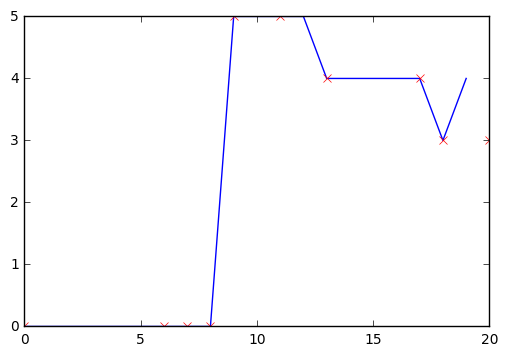

In [14]:
plt.plot(velocities[:all_times[-1]])
plt.plot(np.array(all_times),velocities[np.array(all_times,dtype='int')],'rx')
plt.show()

In [34]:
for li in likes[0:10]:
    for lij in li[0:10]:
        if lij is None or lij == []: continue
        (i,j,t0,t1,models) = lij
        print i,j,t0,t1
        for m in models:
            print m[0],pm.df_summary(m[-1])

0 1 0 6
c0                 mean             sd       mc_error        hpd_2.5  \
y_err  9.216502e-155  1.968747e-155  9.336438e-157  7.461741e-155   

            hpd_97.5  
y_err  1.284496e-154  
cP                 mean             sd       mc_error        hpd_2.5  \
y_err  9.340477e-155  2.275759e-155  1.071466e-156  7.459618e-155   

            hpd_97.5  
y_err  1.365971e-154  
cN                mean            sd      mc_error       hpd_2.5      hpd_97.5
y_N    1.380443e-31  1.494913e-30  1.417272e-31 -2.183515e-30  1.823892e-31
y_err  4.329115e-31  2.126701e-30  2.056083e-31  4.537498e-54  2.608094e-30
acc0                mean            sd      mc_error       hpd_2.5      hpd_97.5
y_acc  2.198453e-28  3.285133e-27  3.011738e-28 -8.644964e-27  8.161643e-31
y_err  8.491856e-28  3.787455e-27  3.662839e-28  4.175863e-52  6.732031e-27
accP                mean            sd      mc_error       hpd_2.5      hpd_97.5
y_acc  3.355199e-29  1.694849e-28  1.644513e-29 -1.525320e-29  2.376117

In [32]:
# What is the mode as of just before each switch-point, 
# and what is the accumulated cost of the approximation up to that point?
modes = [(0,None)]*(len(all_times))

#modes is offset from likes by 1

ks = {"c0":0, "cP":0.5, "cN":1, "acc0":1, "accP":1.5, "accN":2}

cost = 1

for j in range(1, len(all_times)):
    least = float("inf")
    least_template = None
    print "j",j
    for i in range(0, j):
        data = likes[i][j]
        dt = data[3]-data[2]
        the_templates = data[-1]
        print "i",i
        for tn,mod,trace in the_templates:
            k = ks[tn]
            summary = pm.df_summary(trace)
            logp = np.mean([mod.logp(pt) for pt in trace])
            # WAIC
            #crit = pm.stats.waic(model=mod,trace=trace)
            # DIC
            #crit = pm.stats.dic(model=mod,trace=trace)
            # BPIC
            #crit = pm.stats.bpic(model=mod,trace=trace)
            # AICc
            #crit = 2*k - 2 * logp + (2*(k+1)*(k+2))/(dt-k-2)
            # BIC
            # crit = math.log(dt)*k - 2 * logp
            # max-likelihood
            crit = -logp
            m_prev = modes[i][0]
            here = crit + m_prev + cost
            print i,j,data[2],data[3],tn,logp,summary["mean"]["y_err"],crit
            if here < least:
                print "update least",here
                least = here
                # prev_i,this_j,t0,t1,name,summary,criterion
                least_template = (i,j,data[2],data[3],tn,summary,crit)
    modes[j] = (least, least_template)

map(lambda m:m[1],modes)

j 1
i 0
0 1 0 6 c0 1765.21962202 9.21650174979e-155 -1765.21962202
update least -1764.21962202
0 1 0 6 cP 1765.17735377 9.34047666781e-155 -1765.17735377
0 1 0 6 cN 447.966950268 4.32911514838e-31 -447.966950268
0 1 0 6 acc0 419.904709256 8.49185643387e-28 -419.904709256
0 1 0 6 accP 450.048287901 4.67482324851e-29 -450.048287901
0 1 0 6 accN 225.879343937 4.85797099487e-17 -225.879343937
j 2
i 0
0 2 0 7 c0 2119.14351967 8.97856496626e-155 -2119.14351967
update least -2118.14351967
0 2 0 7 cP 2119.17104965 8.8991086295e-155 -2119.17104965
update least -2118.17104965
0 2 0 7 cN 563.296411921 1.01254061539e-30 -563.296411921
0 2 0 7 acc0 548.711815573 1.82385363923e-30 -548.711815573
0 2 0 7 accP 542.092850721 1.92078908639e-31 -542.092850721
0 2 0 7 accN 321.034553251 8.29637538253e-20 -321.034553251
i 1
1 2 6 7 c0 -3.6810186249 0.103674913815 3.6810186249
1 2 6 7 cP -3.67344660243 0.0127225183516 3.67344660243
1 2 6 7 cN -8.0432143901 9.9001976583 8.0432143901
1 2 6 7 acc0 -8.028363320

[None,
 (0,
  1,
  0,
  6,
  'c0',
                  mean             sd       mc_error        hpd_2.5  \
  y_err  9.216502e-155  1.968747e-155  9.336438e-157  7.461741e-155   
  
              hpd_97.5  
  y_err  1.284496e-154  ,
  -1765.2196220214339),
 (0,
  2,
  0,
  7,
  'cP',
                  mean             sd       mc_error        hpd_2.5  \
  y_err  8.899109e-155  1.449947e-155  7.305892e-157  7.468855e-155   
  
              hpd_97.5  
  y_err  1.186315e-154  ,
  -2119.1710496483256),
 (0,
  3,
  0,
  8,
  'c0',
                  mean             sd       mc_error        hpd_2.5  \
  y_err  8.696453e-155  1.468409e-155  6.780579e-157  7.458408e-155   
  
              hpd_97.5  
  y_err  1.133493e-154  ,
  -2473.1357904068705),
 (0,
  4,
  0,
  9,
  'cP',
                  mean             sd       mc_error        hpd_2.5  \
  y_err  8.540545e-155  1.282193e-155  5.789996e-157  7.460484e-155   
  
              hpd_97.5  
  y_err  1.121811e-154  ,
  -2827.097306690318),
 (

In [33]:
def get_path(modes):
    mj = len(modes)-1
    path = [modes[mj]]
    while mj > 0:
        mj = modes[mj][1][0]
        path.append(modes[mj])
    return list(reversed(path))[1:]

get_path(modes)

[(-2826.097306690318,
  (0,
   4,
   0,
   9,
   'cP',
                   mean             sd       mc_error        hpd_2.5  \
   y_err  8.540545e-155  1.282193e-155  5.789996e-157  7.460484e-155   
   
               hpd_97.5  
   y_err  1.121811e-154  ,
   -2827.097306690318)),
 (-2817.719683193634,
  (4, 5, 9, 11, 'c0',            mean        sd  mc_error   hpd_2.5   hpd_97.5
   y_err  6.127265  4.680471  0.227943  1.616127  15.251502, 7.3776234966842127)),
 (-3165.9340411797029,
  (5,
   6,
   11,
   13,
   'cP',
                   mean             sd       mc_error        hpd_2.5  \
   y_err  8.096139e-154  6.538228e-153  2.930340e-154  7.470892e-155   
   
               hpd_97.5  
   y_err  1.935065e-153  ,
   -349.21435798606905)),
 (-3151.6519557675197,
  (6, 9, 13, 20, 'cN',            mean        sd  mc_error   hpd_2.5  hpd_97.5
   y_N    3.975504  0.288402  0.012512  3.389957  4.475405
   y_err  0.743640  0.274995  0.012264  0.326521  1.301742, 13.282085412183118))]

In [18]:
pm.df_summary(likes[0][1][4][0][2])["mean"]["y_err"]

9.2165017497918605e-155